In [1]:
# Import Dependencies
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [3]:
#Read and print US_Accidents_March23_1_percent_cleaned.csv
US_Accidents_Path = Path("data/US_Accidents_March23_1_percent_cleaned.csv")
US_Accidents_df = pd.read_csv(US_Accidents_Path)
US_Accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,Street,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-9300,2,2017-01-02 19:58:45,2017-01-02 20:28:10,39.321247,-120.830399,Multi-vehicle accident on CA-20 Eastbound at J...,State Highway 20,Nevada City,Nevada,...,False,False,False,False,False,False,False,False,False,Night
1,A-11900,2,2017-01-19 21:54:34,2017-01-19 22:38:46,39.321449,-120.849106,Accident on CA-20 Eastbound in Nevada City.,State Highway 20,Nevada City,Nevada,...,False,False,False,False,False,False,False,False,False,Night
2,A-44900,3,2016-06-28 09:26:50,2016-06-28 10:10:00,34.414745,-118.579155,#2 lane blocked and left hand shoulder blocked...,Golden State Fwy S,Valencia,Los Angeles,...,False,False,False,False,False,False,False,False,False,Day
3,A-46300,3,2016-07-05 00:10:32,2016-07-05 00:55:32,34.499092,-118.626350,Accident on I-5 Southbound at Exits 176 176B T...,Golden State Fwy S,Castaic,Los Angeles,...,True,False,False,False,False,False,False,False,False,Night
4,A-46600,2,2016-07-05 20:36:05,2016-07-05 21:21:05,34.352234,-118.548767,Accident and fallen power cables on The Old Rd...,The Old Rd,Newhall,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night


In [4]:
US_Accidents_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52141 entries, 0 to 52140
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 52141 non-null  object 
 1   Severity           52141 non-null  int64  
 2   Start_Time         52141 non-null  object 
 3   End_Time           52141 non-null  object 
 4   Start_Lat          52141 non-null  float64
 5   Start_Lng          52141 non-null  float64
 6   Description        52141 non-null  object 
 7   Street             52141 non-null  object 
 8   City               52141 non-null  object 
 9   County             52141 non-null  object 
 10  State              52141 non-null  object 
 11  Zipcode            52141 non-null  object 
 12  Timezone           52141 non-null  object 
 13  Airport_Code       52141 non-null  object 
 14  Temperature(F)     52141 non-null  float64
 15  Wind_Chill(F)      52141 non-null  float64
 16  Humidity(%)        521

In [ ]:
columns_list = list(US_Accidents_df.columns)
print(columns_list)

['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']


In [8]:
roundabout_counts = US_Accidents_df["Roundabout"].value_counts()
print(roundabout_counts)

Roundabout
False    52139
True         2
Name: count, dtype: int64


In [11]:
#Convert Start_Time column to date/time format
US_Accidents_with_date = US_Accidents_df.copy()
US_Accidents_with_date['Start_Time'] = pd.to_datetime(US_Accidents_df['Start_Time'], format='ISO8601')
# Convert Start_Time to datetime format if it's not already
US_Accidents_with_date['End_Time'] = pd.to_datetime(US_Accidents_df['End_Time'],format='ISO8601' )

# Extract date without time and create a new column
US_Accidents_with_date['Date'] = US_Accidents_with_date['Start_Time'].dt.date

# Extract day of the week and create another new column
US_Accidents_with_date['Week_Day'] = US_Accidents_with_date['Start_Time'].dt.day_name()

US_Accidents_with_date.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,Street,City,County,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Date,Week_Day
0,A-9300,2,2017-01-02 19:58:45,2017-01-02 20:28:10,39.321247,-120.830399,Multi-vehicle accident on CA-20 Eastbound at J...,State Highway 20,Nevada City,Nevada,...,False,False,False,False,False,False,False,Night,2017-01-02,Monday
1,A-11900,2,2017-01-19 21:54:34,2017-01-19 22:38:46,39.321449,-120.849106,Accident on CA-20 Eastbound in Nevada City.,State Highway 20,Nevada City,Nevada,...,False,False,False,False,False,False,False,Night,2017-01-19,Thursday
2,A-44900,3,2016-06-28 09:26:50,2016-06-28 10:10:00,34.414745,-118.579155,#2 lane blocked and left hand shoulder blocked...,Golden State Fwy S,Valencia,Los Angeles,...,False,False,False,False,False,False,False,Day,2016-06-28,Tuesday
3,A-46300,3,2016-07-05 00:10:32,2016-07-05 00:55:32,34.499092,-118.626350,Accident on I-5 Southbound at Exits 176 176B T...,Golden State Fwy S,Castaic,Los Angeles,...,False,False,False,False,False,False,False,Night,2016-07-05,Tuesday
4,A-46600,2,2016-07-05 20:36:05,2016-07-05 21:21:05,34.352234,-118.548767,Accident and fallen power cables on The Old Rd...,The Old Rd,Newhall,Los Angeles,...,False,False,False,False,False,False,False,Night,2016-07-05,Tuesday


In [12]:
#What days of the week accidents occur the most?
# Group by 'Day_of_Week' and count occurrences
day_counts = US_Accidents_with_date.groupby('Week_Day').size().reset_index(name='Count')

# Sort the results by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts['Week_Day'] = pd.Categorical(day_counts['Week_Day'], categories=day_order, ordered=True)
day_counts = day_counts.sort_values('Week_Day')

print(day_counts)



    Week_Day  Count
1     Monday   7932
5    Tuesday   8399
6  Wednesday   8633
4   Thursday   8645
0     Friday   9068
2   Saturday   5204
3     Sunday   4260


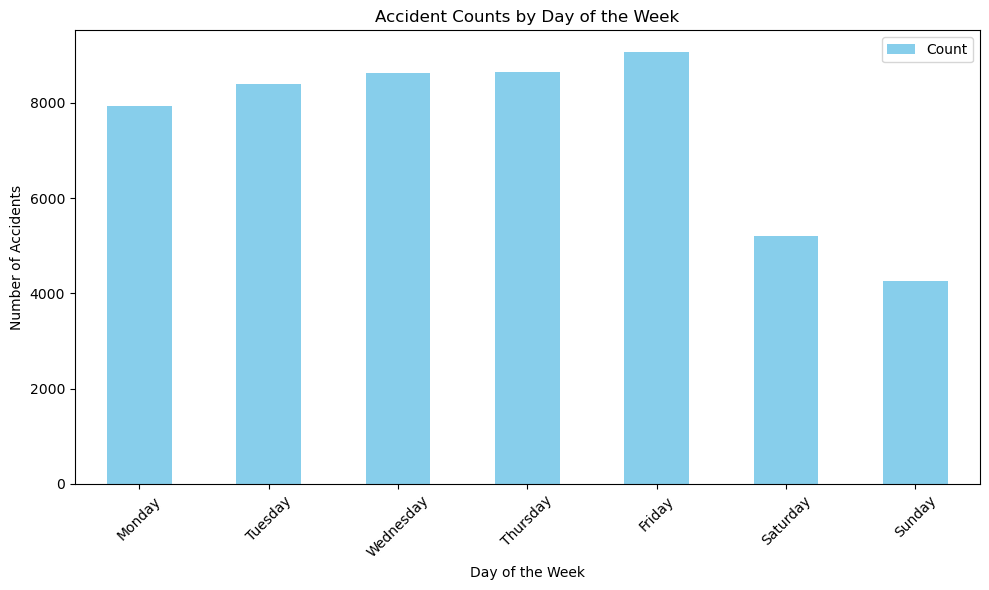

In [13]:
#Plot days of week
day_counts.plot(x='Week_Day', y='Count', kind='bar', figsize=(10, 6), color='skyblue')
# Add titles and labels
plt.title('Accident Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
#Do roundabouts help with reducing accidents?
total_accidents = US_Accidents_with_date.shape[0]
roundabout_accidents = US_Accidents_with_date["Roundabout"].sum()
print(f"Number of accidents with roundabouts {roundabout_accidents}. Total accidents {total_accidents}")
percentage_roundabout = (roundabout_accidents / total_accidents) * 100
percentage_no_roundabout = ((total_accidents - roundabout_accidents)/total_accidents)*100
print (f"Percentage of accidents with roundabouts is: {percentage_roundabout}%")
print (f"Percentage of accidents without roundabouts is: {percentage_no_roundabout:.2f}%")


Number of accidents with roundabouts 2. Total accidents 52141
Percentage of accidents with roundabouts is: 0.0038357530542183693%
Percentage of accidents without roundabouts is: 100.00%


## Weather and Enviroment


In [17]:
#Accidents during windy, rainy, foggy and snowy conditions
windy_conditions = US_Accidents_df[US_Accidents_df['Weather_Condition'].str.contains('Windy', na=False)]
rainy_conditions = US_Accidents_df[US_Accidents_df['Weather_Condition'].str.contains('Rain', na=False)]
foggy_conditions = US_Accidents_df[US_Accidents_df['Weather_Condition'].str.contains('Fog', na=False)]
snow_conditions = US_Accidents_df[US_Accidents_df['Weather_Condition'].str.contains('Snow', na=False)]

In [19]:
rainy_perc = (rainy_conditions["ID"].count() / US_Accidents_df["ID"].count())* 100
windy_perc = (windy_conditions["ID"].count() / US_Accidents_df["ID"].count())* 100
foggy_perc = (foggy_conditions["ID"].count() / US_Accidents_df["ID"].count())* 100
snow_perc = (snow_conditions["ID"].count() / US_Accidents_df["ID"].count())* 100

In [22]:
print(f"Occurance of accidents when its Raining : {rainy_perc:.2f}%")
print(f"Occurance of accidents when its Windy : {windy_perc:.2f}%")
print(f"Occurance of accidents when its Foggy : {foggy_perc:.2f}%")
print(f"Occurance of accidents when its Snowing : {snow_perc:.2f}%")

Occurance of accidents when its Raining : 7.26%
Occurance of accidents when its Windy : 1.96%
Occurance of accidents when its Foggy : 1.73%
Occurance of accidents when its Snowing : 2.76%


In [24]:
print(f"Average severity of accidents when its Windy : {windy_conditions['Severity'].mean():.2f}")
print(f"Average severity of accidents when its Rainy : {rainy_conditions['Severity'].mean():.2f}")
print(f"Average severity of accidents when its Foggy : {foggy_conditions['Severity'].mean():.2f}")
print(f"Average severity of accidents when its Snowing : {snow_conditions['Severity'].mean():.2f}")



Average severity of accidents when its Windy : 2.17
Average severity of accidents when its Rainy : 2.20
Average severity of accidents when its Foggy : 2.12
Average severity of accidents when its Snowing : 2.19


## Visibility

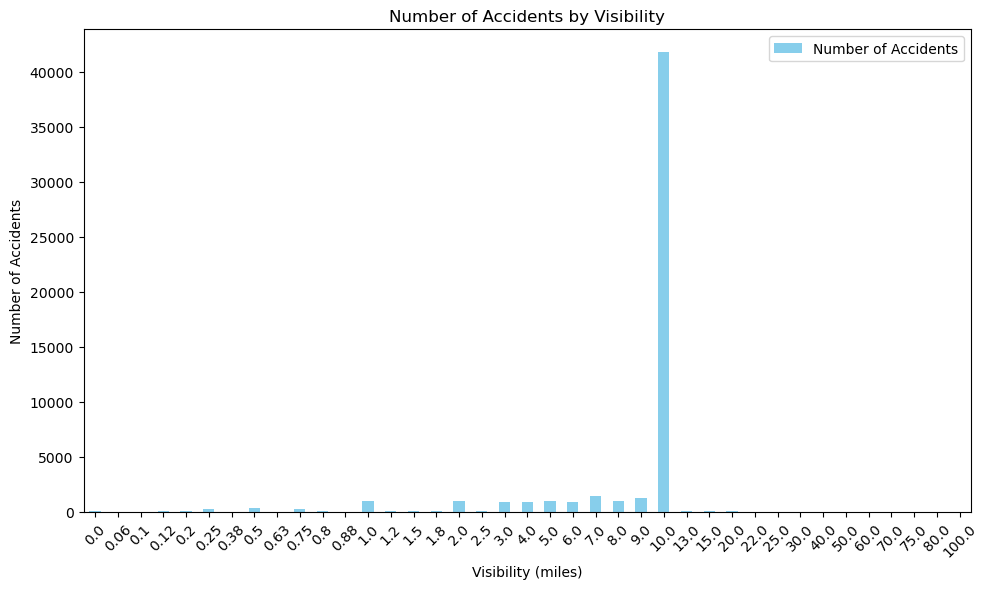

In [15]:
#How visibility affects number of accidents
visibility_counts = US_Accidents_with_date.groupby('Visibility(mi)')['ID'].count().reset_index()
visibility_counts.columns = ['Visibility(mi)', 'Number of Accidents']
visibility_counts = visibility_counts.sort_values(by='Visibility(mi)')

# Create a bar chart for visibility counts
visibility_counts.plot(x='Visibility(mi)', y='Number of Accidents', kind='bar', figsize=(10, 6), color='skyblue')

# Add titles and labels
plt.title('Number of Accidents by Visibility')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Accidents')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

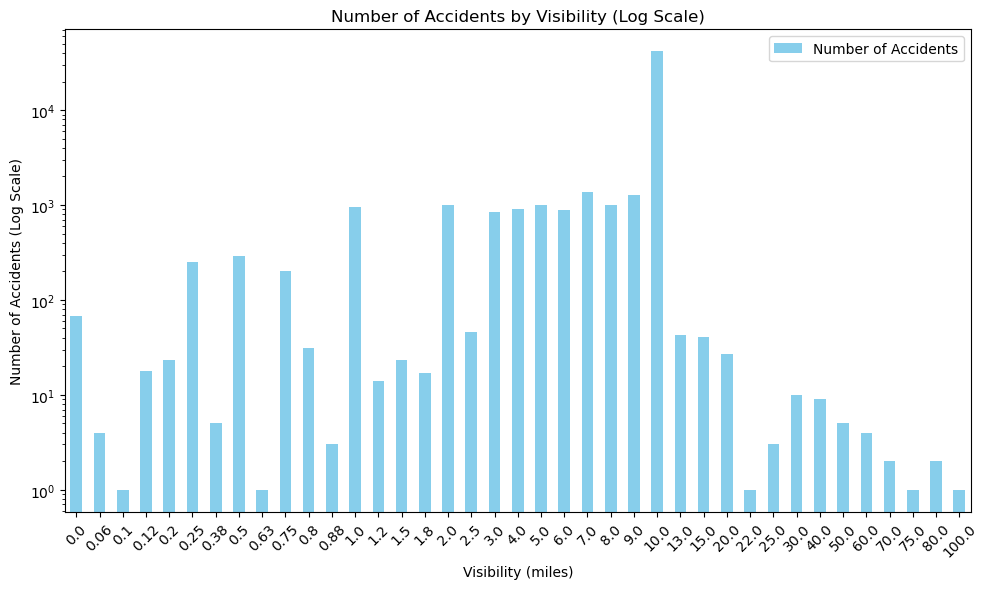

In [28]:
#Visibility chart logarithmic scale
visibility_counts.plot(x='Visibility(mi)', y='Number of Accidents', kind='bar', figsize=(10, 6), color='skyblue', logy=True)

# Add titles and labels
plt.title('Number of Accidents by Visibility (Log Scale)')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Accidents (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


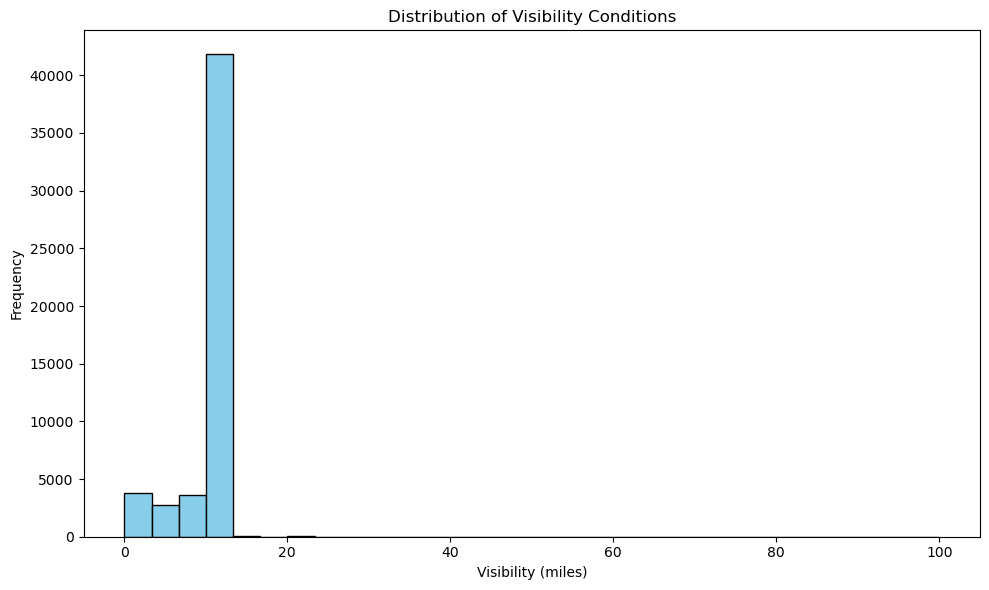

In [29]:
#Distribution of visibility
plt.figure(figsize=(10, 6))
US_Accidents_df['Visibility(mi)'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Visibility Conditions')
plt.xlabel('Visibility (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

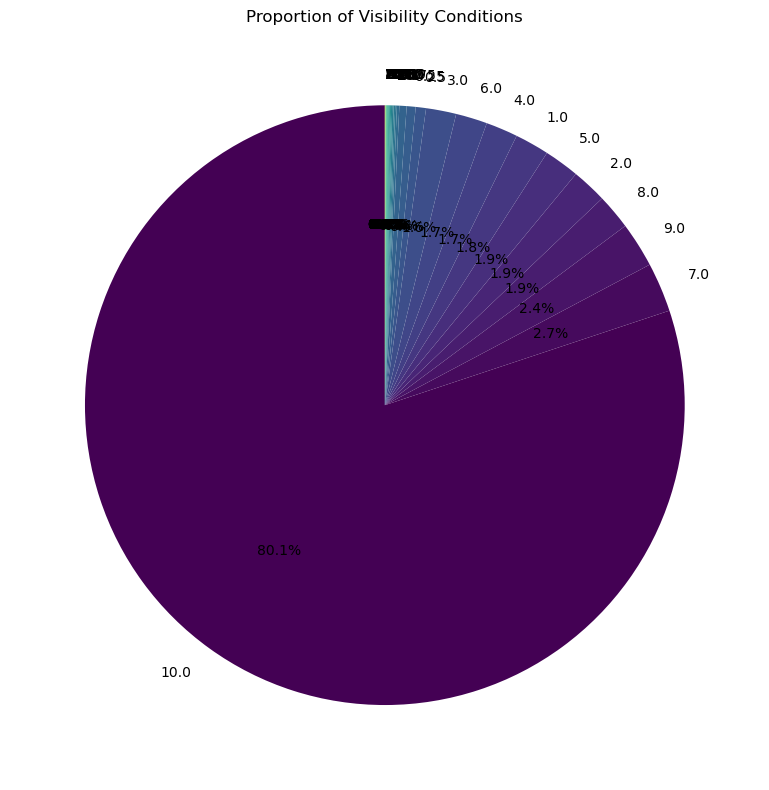

In [ ]:
visibility_distribution = US_Accidents_df['Visibility(mi)'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 8))
visibility_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')

# Add title
plt.title('Proportion of Visibility Conditions')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
#Normalizing accidents by frequency of each visibility condition. 
# Calculate the total number of accidents
total_accidents = US_Accidents_df['ID'].count()
print(f"Total accidents: {total_accidents}")
#Count for each visibility
visibility_accidents = US_Accidents_df.groupby('Visibility(mi)')['ID'].count().reset_index(name='Number of Accidents')
# Calculate proportions of accidents for each visibility range
visibility_accidents['Proportion'] = visibility_accidents['Number of Accidents'] / total_accidents

# Calculate normalized rates (Accidents / Proportion)
visibility_accidents['Normalized Rate'] = visibility_accidents['Number of Accidents'] / visibility_accidents['Proportion']

#Sort
visibility_accidents = visibility_accidents.sort_values(by='Number of Accidents', ascending=alse)

visibility_accidents

Total accidents: 52141


,Visibility(mi),Number of Accidents,Proportion,Normalized Rate
25,10.00,41767,0.801039,52141.0
22,7.00,1386,0.026582,52141.0
24,9.00,1269,0.024338,52141.0
23,8.00,995,0.019083,52141.0
16,2.00,992,0.019025,52141.0
20,5.00,991,0.019006,52141.0
12,1.00,964,0.018488,52141.0
19,4.00,898,0.017223,52141.0
21,6.00,885,0.016973,52141.0
18,3.00,848,0.016264,52141.0


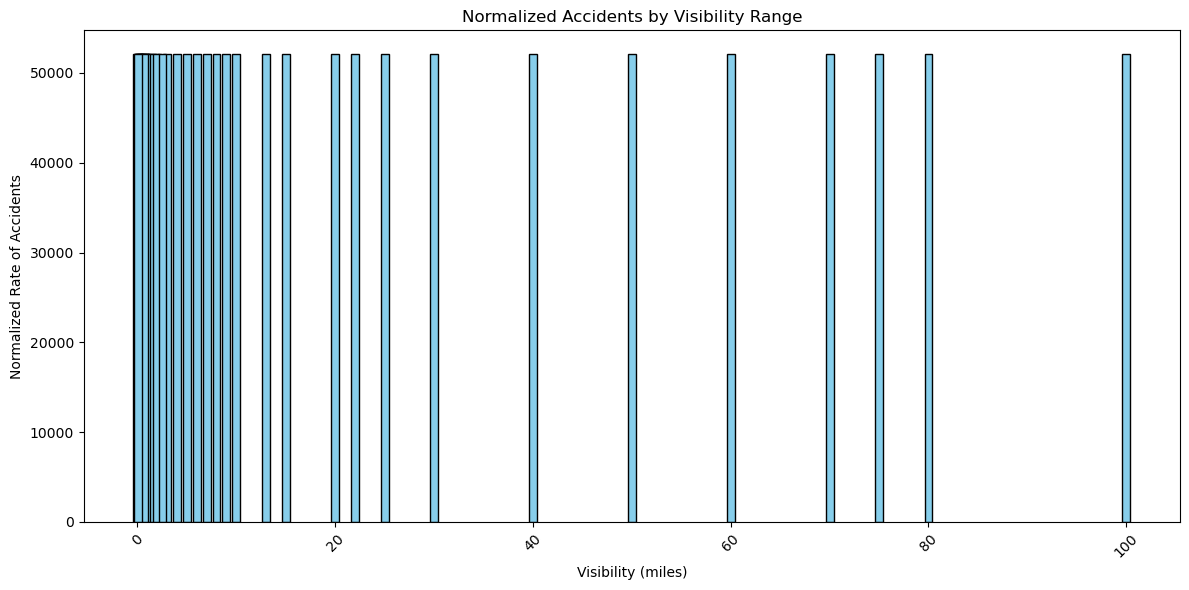

In [44]:
# Plot normalized accidents
plt.figure(figsize=(12, 6))
plt.bar(visibility_accidents['Visibility(mi)'], visibility_accidents['Normalized Rate'], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Normalized Accidents by Visibility Range')
plt.xlabel('Visibility (miles)')
plt.ylabel('Normalized Rate of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
bins = [0, 0.3, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]
labels = ['0-0.3', '0.3-0.5', '0.5-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10+']

US_Accidents_with_date['Visibility Category'] = pd.cut(US_Accidents_with_date['Visibility(mi)'], bins=bins, labels=labels, right=False)

visibility_accidents = US_Accidents_with_date.groupby('Visibility Category')['ID'].count().reset_index(name='Number of Accidents')

print(visibility_accidents)


   Visibility Category  Number of Accidents
0                0-0.3                  365
1              0.3-0.5                    5
2                0.5-1                  527
3                  1-2                 1018
4                  2-3                 1038
5                  3-4                  848
6                  4-5                  898
7                  5-6                  991
8                  6-7                  885
9                  7-8                 1386
10                 8-9                  995
11                9-10                 1269
12                 10+                41916


C:\Users\masce\AppData\Local\Temp\ipykernel_7748\3380246241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visibility_accidents = US_Accidents_with_date.groupby('Visibility Category')['ID'].count().reset_index(name='Number of Accidents')


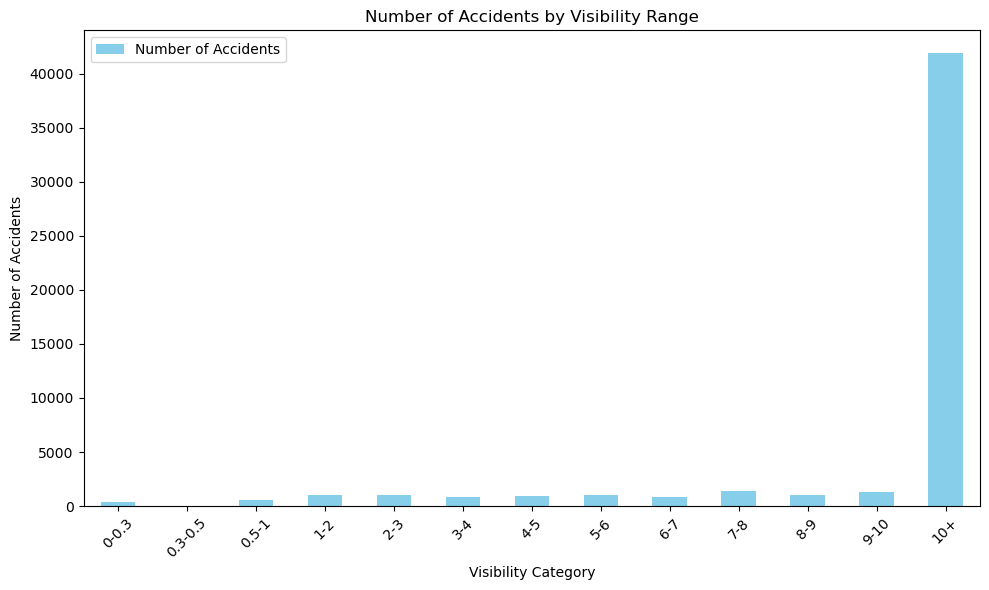

In [51]:
#Polt visibility accidents
visibility_accidents.plot(x='Visibility Category', y='Number of Accidents', kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Accidents by Visibility Range')
plt.xlabel('Visibility Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:


#Exclude 10 miles visibility
US_Accidents_with_date['Visibility Category'] = pd.cut(
    US_Accidents_with_date['Visibility(mi)'], 
    bins=bins, 
    labels=labels, 
    right=False
)

# Group by visibility category and count accidents
visibility_accidents = US_Accidents_with_date.groupby('Visibility Category')['ID'].count().reset_index(name='Number of Accidents')

# Print the result
print(visibility_accidents)


   Visibility Category  Number of Accidents
0                0-0.3                  365
1              0.3-0.5                    5
2                0.5-1                  527
3                  1-2                 1018
4                  2-3                 1038
5                  3-4                  848
6                  4-5                  898
7                  5-6                  991
8                  6-7                  885
9                  7-8                 1386
10                 8-9                  995
11                  9+                43185


C:\Users\masce\AppData\Local\Temp\ipykernel_7748\1002528955.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visibility_accidents = US_Accidents_with_date.groupby('Visibility Category')['ID'].count().reset_index(name='Number of Accidents')


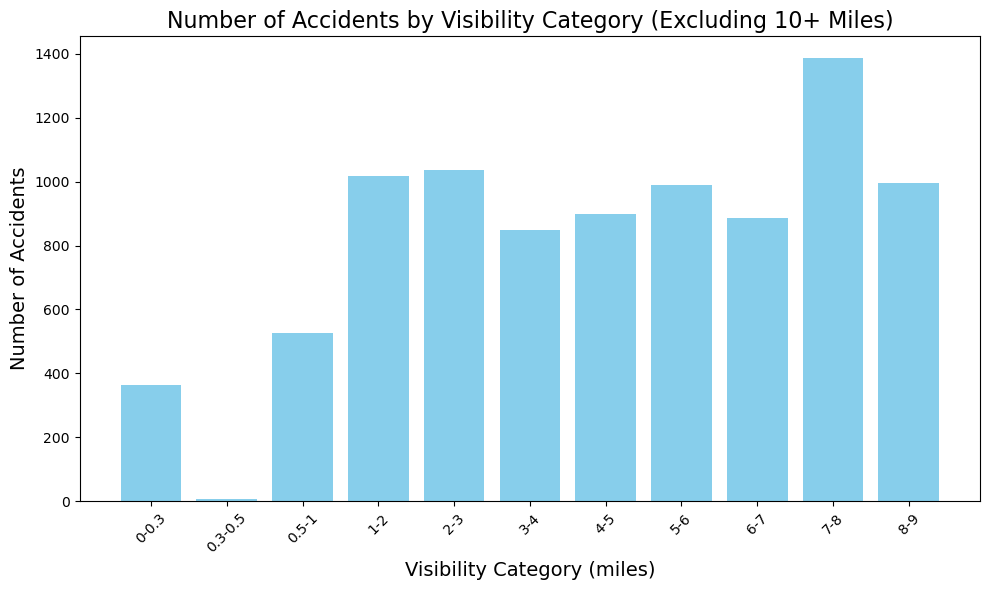

In [60]:
filtered_accidents = visibility_accidents[visibility_accidents['Visibility Category'] != '9+']

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(filtered_accidents['Visibility Category'], filtered_accidents['Number of Accidents'], color='skyblue')
plt.title('Number of Accidents by Visibility Category (Excluding 10+ Miles)', fontsize=16)
plt.xlabel('Visibility Category (miles)', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Initiate map
map = folium.Map(location=[US_Accidents_with_date['Start_Lat'].mean(), US_Accidents_with_date['Start_Lng'].mean()], zoom_start=6)
# Add MarkerCluster to group points together
marker_cluster = MarkerCluster().add_to(map)
for idx, row in US_Accidents_with_date.iterrows():
    folium.Marker(
        location=[row['Start_Lat'], row['Start_Lng']],
        popup=f"Accident ID: {row['ID']}. Severity: {row['Severity']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)
#Show the map
map